# Other HCP maps

Goal: Correlate PCs with HCP maps from Jakob

In [88]:
# Import modules and R
import numpy as np, pandas as pd
from plotnine import *
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [169]:
import sys, os
sys.path.append('../code')
import pcaVersion
from processing_helpers import *
from analysis_helpers import *
from null_tests import *
%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");
%R source("../code/plot_maps.R");

In [3]:
maps_jakob = (
    pd.read_csv("../data/stat_maps_HCP_forRichard.csv")
    .apply(lambda x: (x-np.mean(x))/np.std(x))
    .sort_index(axis=1)
    .set_index(get_labels_hcp()[:180])
    .rename_axis('region')#.reset_index()
)

Select certain maps

In [4]:
selected_maps = {
    #PC1
    'thickness':'Thickness',
    'T1T2':'Myelination (T1w/T2w ratio)',
    'glasser_CMRO2':'Oxygen Metabolic Rate (CMRO2)',

    #PC2
    'hill.dev_remapped':'Developmental Expansion',
    'externopyramidisation':'Intracortical Connectivity Distance',
    'glasser_GI':'Glycolytic Index (CMRO2/CMRGlu)',
    #PC3
    'allom':'Size Variation (allometric scaling)',
    'CBF':'Cerebral Blood Flow',
    'glasser_CMRGlu':'Glucose Metabolic Rate (CMRGlu)',
    #axes
    'x':'X axis',
    'y':'Y axis',
    'z':'Z axis'
}

maps = maps_jakob.loc[:, list(selected_maps.keys())]
maps

,thickness,T1T2,glasser_CMRO2,hill.dev_remapped,externopyramidisation,glasser_GI,allom,CBF,glasser_CMRGlu,x,y,z
region,,,,,,,,,,,,
V1,-2.310289,1.977036,2.873226,-0.275131,1.769126,-1.523300,-1.085134,-0.179597,1.231160,-1.255505,1.560962,-0.583163
MST,-0.815568,1.575121,0.318382,0.246052,0.630473,-0.392062,0.965346,0.415531,0.017804,0.738100,1.155091,-0.203728
V6,-1.721457,1.647248,1.291453,-0.610757,-1.006875,-0.755553,-0.020746,-0.433862,0.515730,-0.966524,1.438821,0.519752
V2,-2.030079,1.665496,2.060033,-0.614974,1.377546,-1.113092,-1.157744,-0.156811,0.871595,-1.142430,1.510433,-0.497031
V3,-1.497054,1.430449,0.991689,-0.479010,1.888340,-0.421922,-0.624528,-0.268078,0.480104,-0.879968,1.576216,-0.374542
...,...,...,...,...,...,...,...,...,...,...,...,...
STSva,0.205376,-0.795757,-1.549051,1.170922,1.400205,-0.482769,0.609727,-0.064344,-1.356592,1.176556,-0.238875,-1.290717
TE1m,1.084687,-0.634758,-1.006154,1.626480,-0.677230,0.461361,0.906969,1.361941,-0.469423,1.884027,0.182489,-1.208325
PI,-0.240927,-1.391843,-2.744273,-2.009474,-1.012710,-1.762716,0.118060,-0.387085,-2.885445,0.744796,-0.359852,-1.148027


In [5]:
data_dir = "../data/abagen-data/expression/"
hcp_base = pcaVersion(pd.read_csv(data_dir + 'hcp_base.csv', index_col=0))
# hcp_3donors = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors.csv', index_col=0))
# hcp_3donors_ds7 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds7.csv', index_col=0))
hcp_3donors_ds8 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds8.csv', index_col=0))
# hcp_3donors_ds9 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds9.csv', index_col=0))

New PCA version
New PCA version


Get correlations

In [92]:
version = hcp_3donors_ds8
scores = hcp_base.score_from(hcp_3donors_ds8).iloc[:,:3].apply(lambda x: (x-np.mean(x))/np.std(x))

corrs = get_corrs(scores, maps, method='spearman')
corrs.style.format('{:.2f}')

,PC1,PC2,PC3
thickness,-0.66,0.11,0.00
T1T2,0.79,-0.20,0.27
glasser_CMRO2,0.66,0.11,-0.07
hill.dev_remapped,-0.14,0.38,-0.13
externopyramidisation,0.12,-0.66,0.11
glasser_GI,0.15,0.58,-0.43
allom,0.17,0.10,-0.12
CBF,0.05,0.22,-0.44
glasser_CMRGlu,0.51,0.43,-0.29
x,0.04,-0.23,-0.21


Random shuffles?

In [44]:
generate_shuffles(maps)
shuffle_maps = np.load("../outputs/shuffle_maps_1000.npy")

null_corrs = corr_nulls_from_maps(shuffle_maps, scores)

In [134]:
spin_maps_1000 = np.load("../outputs/spin_maps_1000.npy")
map_inds = maps_jakob.columns.get_indexer(maps.columns)
spin_maps = spin_maps_1000[:,map_inds,:]
null_corrs = corr_nulls_from_maps(spin_maps, scores, maps)

Random shuffles?

Spin PCs instead?

In [142]:
spin_pcs_1000 = np.load("../outputs/spin_pcs_1000.npy")
spin_pcs = spin_pcs_1000
null_corrs = corr_nulls_from_pcs(spin_pcs, scores, maps)

What if we use surrogate brain maps instead of spins?

In [ ]:
generate_surrogates(maps, 1000, '../outputs/sim_maps_1000.npy')
# sim_maps_1000 = np.load("../outputs/sim_maps_1000.npy")
# sim_maps_1000.shape

## Analyze!

Get p values and significance

In [23]:
from scipy.stats import percentileofscore

spin_p = np.zeros(corrs.shape)
for m, _map in enumerate(corrs.index):
    for i in range(3):
        _spin_corrs = spin_corrs.set_index('map').loc[_map].iloc[:,i]
        _corr = corrs.iloc[m,i]
        p = percentileofscore(_spin_corrs, _corr)/100
        if p > .5:
            p = 1-p
        spin_p[m,i] = p

spin_p = pd.DataFrame(spin_p, index=corrs.index, columns=corrs.columns)

In [24]:
spin_sig = (spin_p
                .apply(lambda x: x<.05)
            .loc[selected_maps.keys()]
                # .sort_values(['PC1','PC2','PC3'], ascending=False)
               )

map_corrs_sig = (corrs
 .loc[spin_sig.index]
 .round(2).astype('string')
 .where(spin_p > .05, other = lambda x: x+' *')
 .where(spin_p > .01, other = lambda x: x+'*')
 .where(spin_p > .001, other = lambda x: x+'*')
)
# map_corrs_sig.to_csv("../outputs/map_corrs_sig.csv")
map_corrs_sig

,PC1,PC2,PC3
thickness,-0.66 ***,0.11,0.0
T1T2,0.79 ***,-0.2,0.27
glasser_CMRO2,0.66 ***,0.11,-0.07
hill.dev_remapped,-0.14,0.38 *,-0.13
externopyramidisation,0.12,-0.66 *,0.11
glasser_GI,0.15,0.58 *,-0.43 **
allom,0.17,0.1,-0.12
CBF,0.05,0.22,-0.44 **
glasser_CMRGlu,0.51 *,0.43,-0.29
x,0.04,-0.23,-0.21


In [25]:
maps_order = maps.loc[:, spin_sig.index]

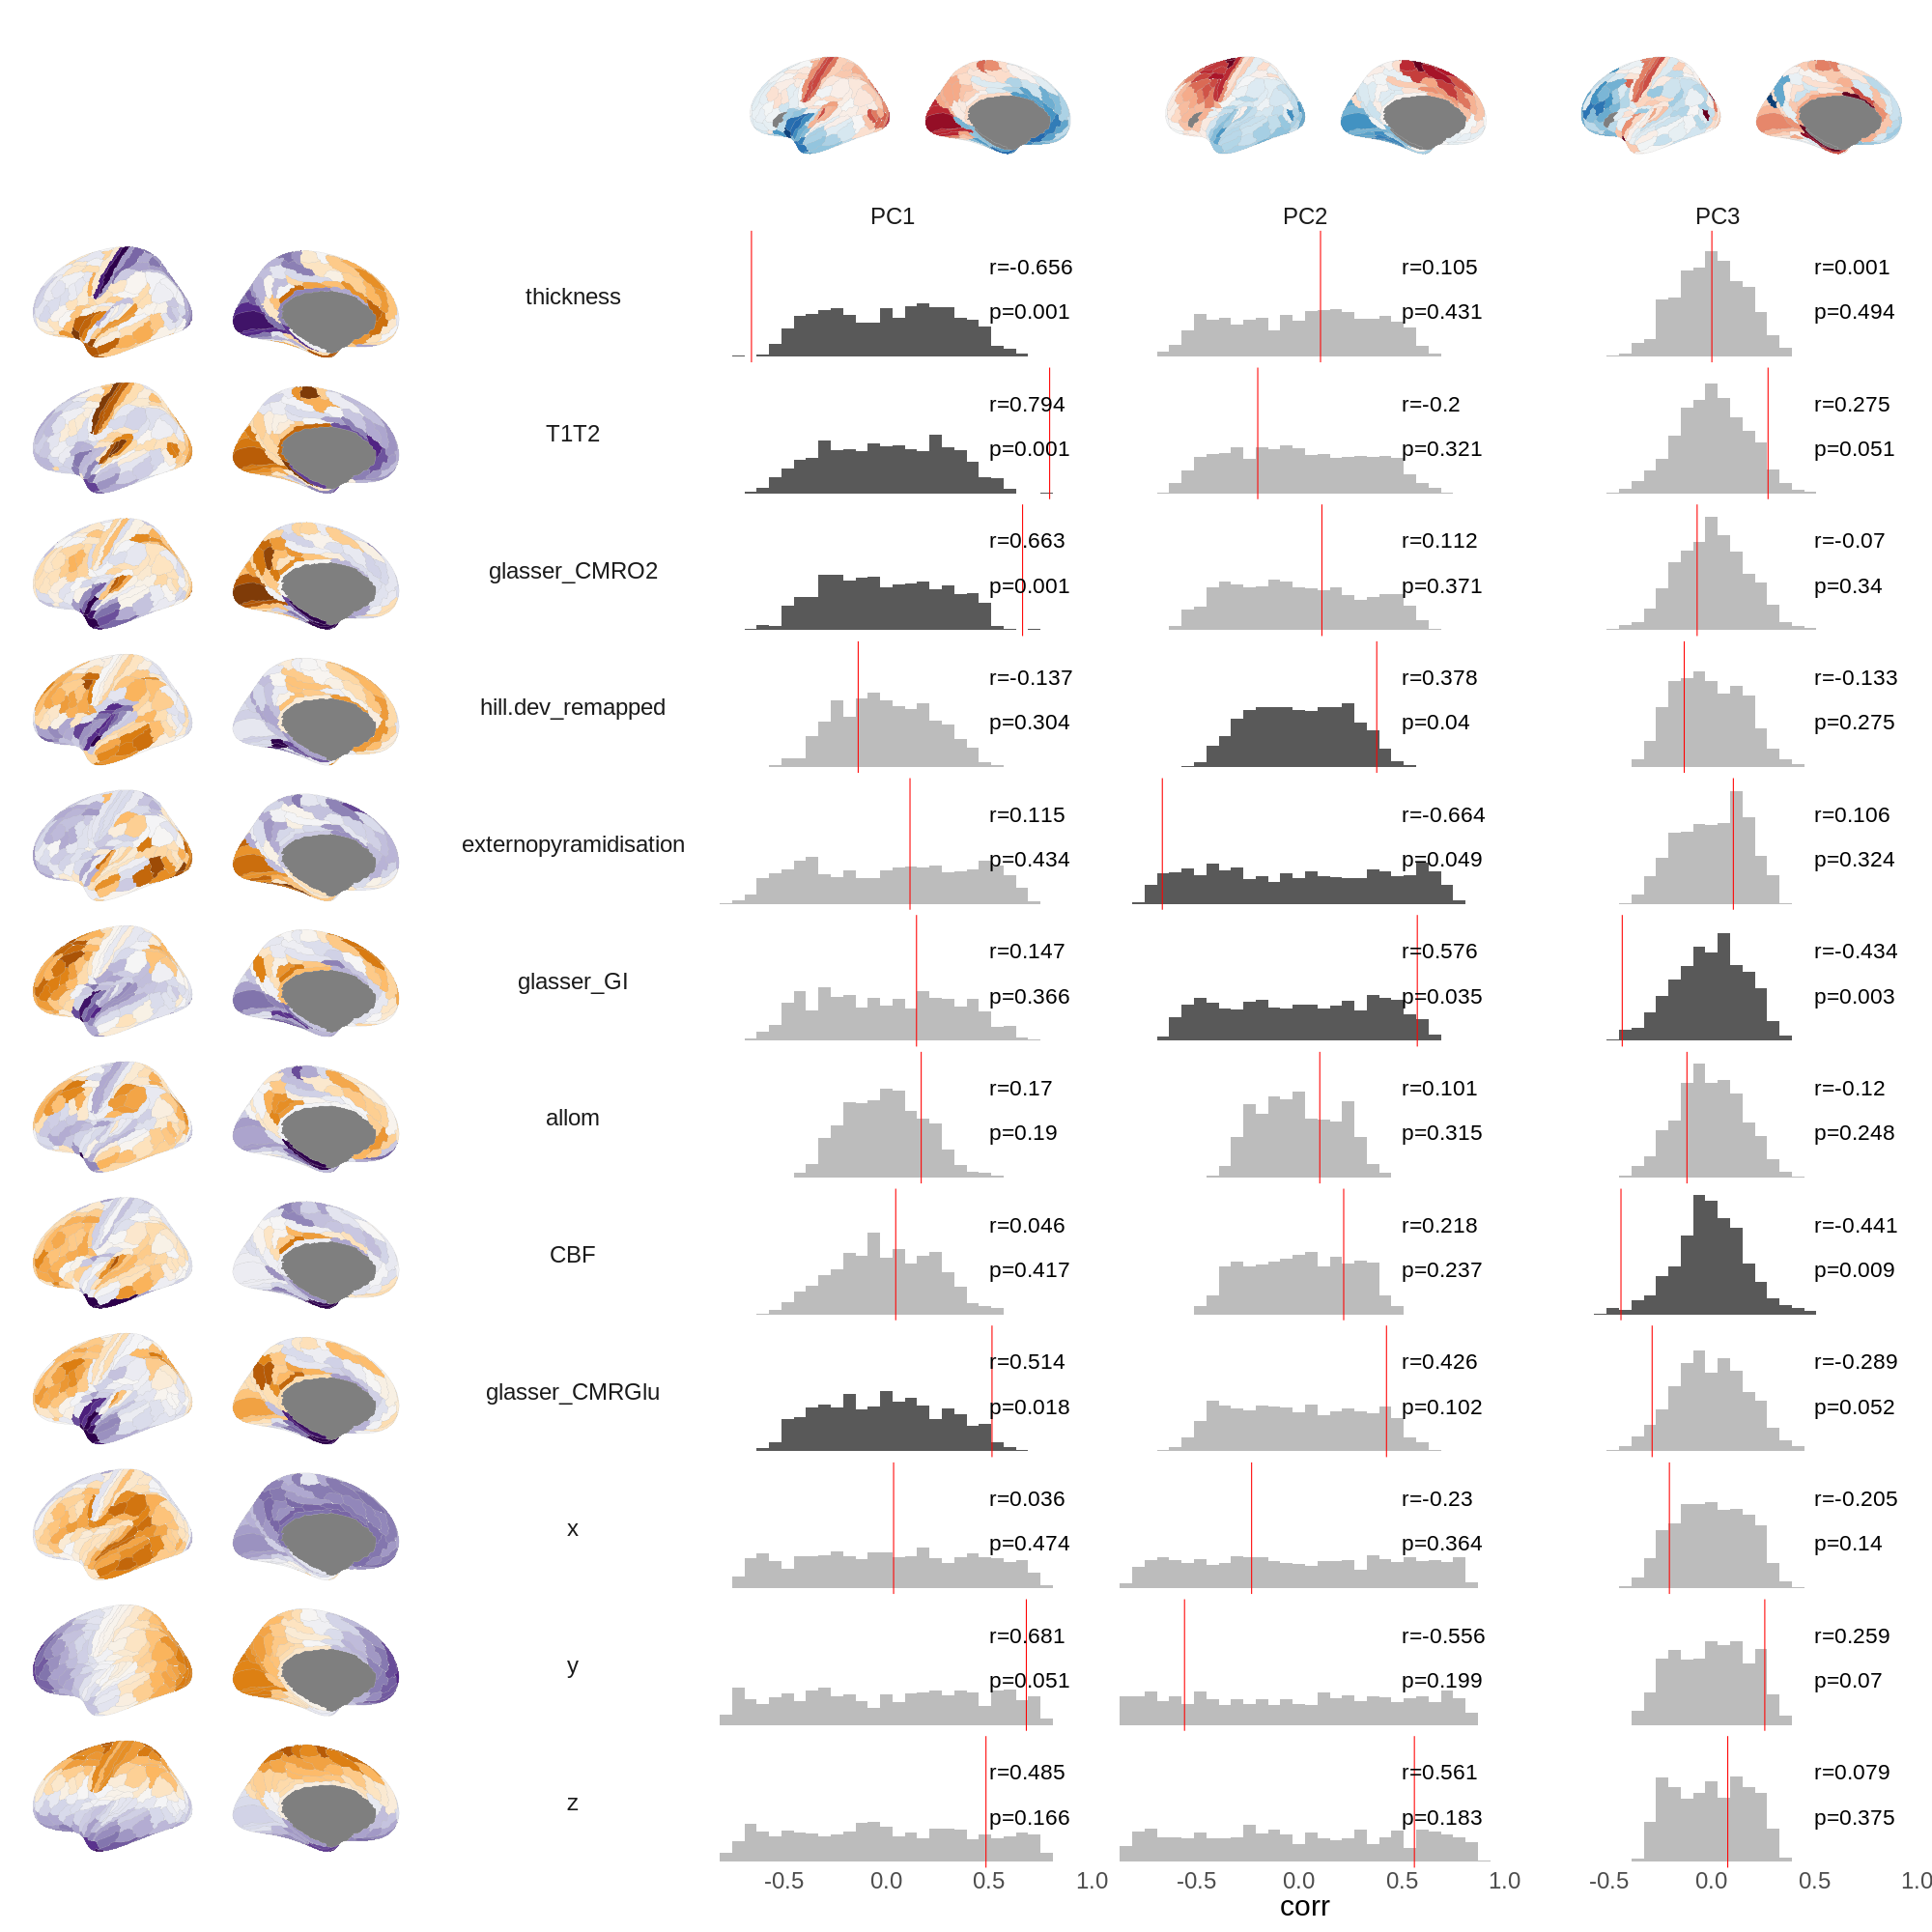

In [26]:
%%R -i corrs -i spin_corrs -i spin_p -i spin_sig -i scores -i maps_order -w 2000 -h 2000
source("../code/plot_maps.R")
g1 <- plot_spin_corrs(corrs, spin_corrs, spin_p, spin_sig)
g2 <- plot_hcp_wide(scores) + guides(fill='none')
g3 <- plot_maps(maps_order, colors=rev(brewer.puor(100)), ncol=1) + theme(strip.text.x=element_blank()) + guides(fill='none')

(
    ((plot_spacer() | g2) + plot_layout(widths=c(3,5))) / 
    ((g3 | g1) + plot_layout(widths=c(1,3)))
) + plot_layout(heights=c(1,12))

Plot spins

In [ ]:
pc2 = (spin_corrs
 .set_index('map').loc['externopyramidisation']
 # .apply(abs)
 .loc[:, 'PC2']
)
ind = np.argpartition(pc2, 4)[:5]
pc2[ind]

In [ ]:
spins_to_plot = (
    pd.DataFrame(spin_maps_1000[:,8,ind], index=list(range(1,181)), columns=round(pc2[ind],3))
    .join(get_labels_hcp())
    .melt(id_vars='label', var_name='version', value_name='score')
    .assign(version = lambda x: 'corr = ' + x['version'].astype('str'))
    .fillna(0)
)
spins_to_plot

In [ ]:
%%R -i spins_to_plot -w 2000 -h 800
df <- spins_to_plot %>% 
        mutate(region = recode(label,'7Pl'='7PL')) %>% select(-label) %>%
        group_by(version)

    m <- pmax(
#         df %>% filter(component=='PC1') %>% .$score %>% quantile(.95) %>% abs,
#         df %>% filter(component=='PC1') %>% .$score %>% quantile(.05) %>% abs
        df %>% .$score %>% quantile(.99) %>% abs,
        df %>% .$score %>% quantile(.01) %>% abs
    )

    glasser$data <- glasser$data %>% filter(hemi=='left')
    
    ggplot(df) + 
    geom_brain(
        atlas=glasser,
        mapping=aes(fill=score, geometry=geometry, hemi=hemi, side=side, type=type),
        colour='grey', size=.1,
        show.legend=T
        ) +
    theme_void() + 
    facet_wrap(~version) +
    theme(legend.position='bottom',
          strip.text.x=element_text(vjust=1),
          strip.text.y.left = element_text(angle = 0),
          plot.title=element_text(hjust=0.5)) +
    #   scale_fill_cmocean(name='balance', limits=c(-m,m), oob=squish) +
#     scale_fill_gradient2(low=muted('red'), high=muted('blue'), 
    scale_fill_gradientn(colors=rev(brewer.puor(100)), 
                         limits=c(-m,m), oob=squish, breaks=c(-m,0,m), 
                         labels=c(round(-m,2),0,round(m,2)), name=''
                        ) +
    coord_sf(clip='off') + xlab("") + ylab("") +
    theme(text=element_text(size=30))